In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [2]:
# Load treatment plan results
result = np.load('result', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('result', 'wb'))

In [4]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Bronchus,MaxDvh,AtMost,1560,18.52
1,Bronchus,MaxDose,AtMost,3480,NaN
2,Chestwall_L,MaxDvh,AtMost,3000,2.04
3,D2cm,MaxDose,AtMost,2400,NaN
4,Esophagus,MaxDvh,AtMost,1880,16.91
5,Esophagus,MaxDose,AtMost,3000,NaN
6,GreatVes,MaxDvh,AtMost,4300,5.66
7,GreatVes,MaxDose,AtMost,4900,NaN
8,Heart,MaxDvh,AtMost,2800,1.84
9,Heart,MaxDose,AtMost,3400,NaN


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,"[780,1560]",18.52,NaN,1
1,Bronchus,MaxDose,"[1740,3480]",0.00,NaN,1
2,Chestwall_L,MaxDvh,"[1500,3000]",2.04,NaN,1
3,D2cm,MaxDose,"[1200,2400]",0.00,NaN,1
4,Esophagus,MaxDvh,1880,16.91,NaN,1
5,Esophagus,MaxDose,3000,0.00,NaN,1
6,GreatVes,MaxDvh,4300,5.66,NaN,1
7,GreatVes,MaxDose,4900,0.00,NaN,1
8,Heart,MaxDvh,2800,1.84,NaN,1
9,Heart,MaxDose,3400,0.00,NaN,1


In [6]:
# Clinical goal results
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][0]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'Result': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'Result', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,Result,PercentChange
0,Bronchus,MaxDvh,1560.0,925.021653,-4.070374e+01
1,Bronchus,MaxDose,3480.0,2111.005859,-3.933891e+01
2,Chestwall_L,MaxDvh,3000.0,1858.356385,-3.805479e+01
3,D2cm,MaxDose,2400.0,2634.338135,9.764089e+00
4,Esophagus,MaxDvh,1880.0,684.242201,-6.360414e+01
5,Esophagus,MaxDose,3000.0,1143.862427,-6.187125e+01
6,GreatVes,MaxDvh,4300.0,1116.825761,-7.402731e+01
7,GreatVes,MaxDose,4900.0,1573.748535,-6.788268e+01
8,Heart,MaxDvh,2800.0,859.837578,-6.929152e+01
9,Heart,MaxDose,3400.0,1453.888062,-5.723859e+01


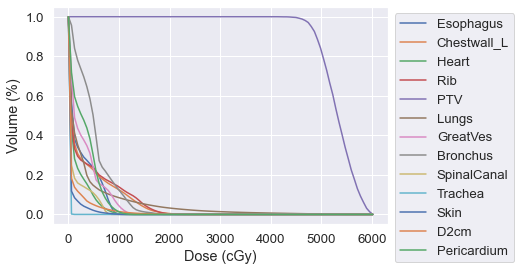

In [7]:
# Dose-volume histograms
result.dvhplot()

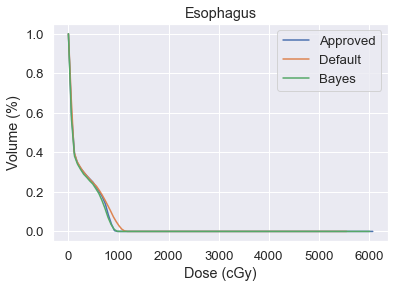

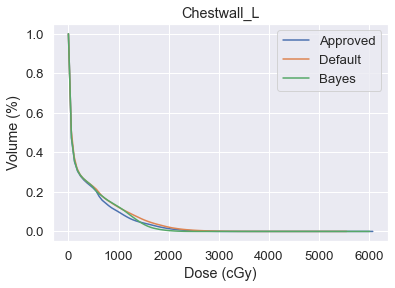

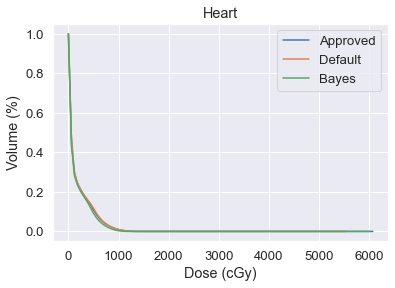

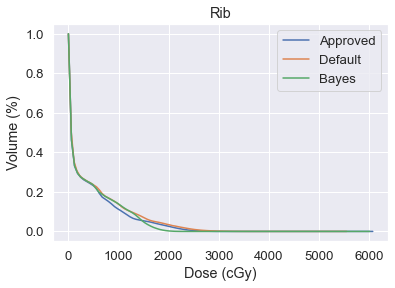

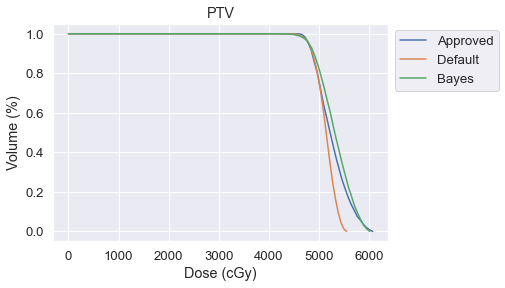

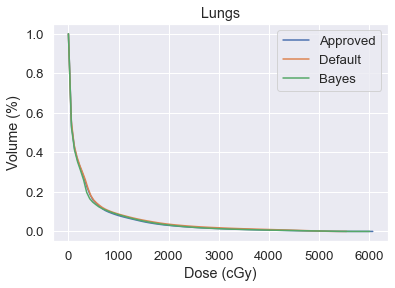

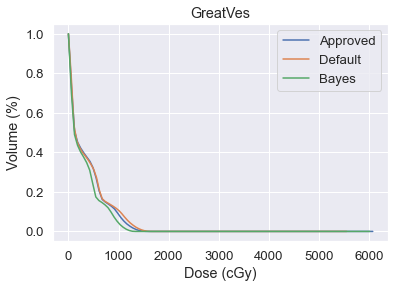

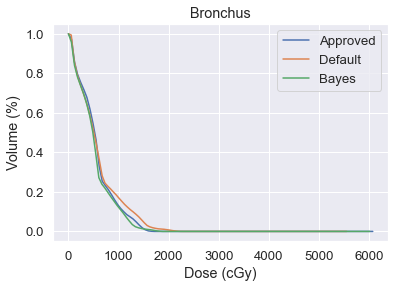

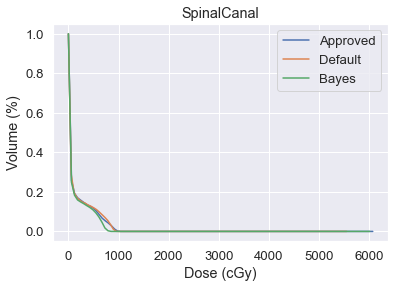

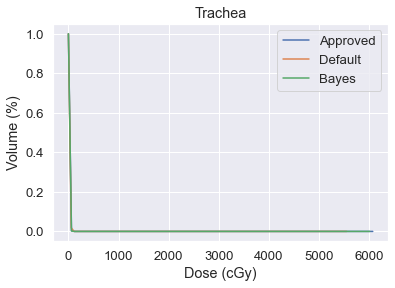

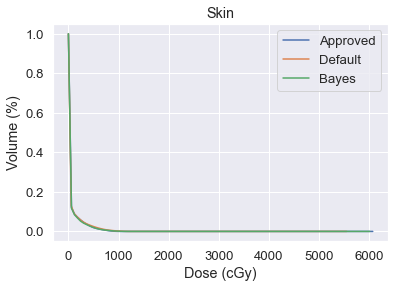

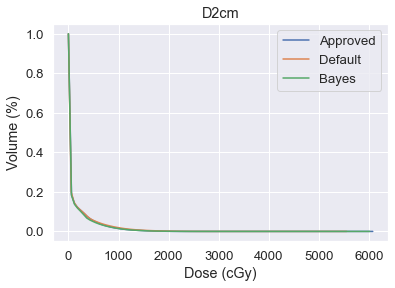

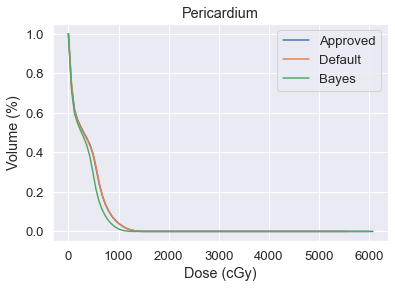

In [8]:
# Compare to approved and default plans
approved = np.load('../approved/result', allow_pickle=True)
default = np.load('../default/result', allow_pickle=True)
for roi in result.roi_list:
    plt.figure()
    plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi])
    plt.plot(default.dvh_dict['Dose'], default.dvh_dict[roi])
    plt.plot(result.dvh_dict['Dose'], result.dvh_dict[roi])
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Volume (%)')
    plt.title(roi)
    plt.legend(['Approved', 'Default', 'Bayes'], bbox_to_anchor=(1, 1))

In [33]:
# Compare DC2m MaxDose
index = approved.goal_df[approved.goal_df['Roi'] == 'D2cm'].index[0]
print(f"AcceptanceLevel: {approved.goal_df.iloc[index]['AcceptanceLevel']}, " +
      f"Approved: {approved.goal_dict[index][0]:.2f}, " +
      f"Default: {default.goal_dict[index][0]:.2f}, " +
      f"Result: {result.goal_dict[index][np.argmin(result.opt_result.func_vals)]:.2f}")

AcceptanceLevel: 2400, Approved: 2513.27, Default: 3082.28, Result: 2738.48


In [36]:
# Compare goal results
idx_min = np.argmin(result.opt_result.func_vals)
for index, row in approved.goal_df.iterrows():
    level = row['AcceptanceLevel']
    app_val = approved.goal_dict[index][0]
    def_val = default.goal_dict[index][0]
    res_val = result.goal_dict[index][idx_min]
    print(f"Roi: {row['Roi']}, Approved: {100*(app_val - level)/level:.2f}, " +
          f"Default: {100*(def_val - level)/level:.2f}, " +
          f"Result: {100*(res_val - level)/level:.2f}")

Roi: Bronchus, Approved: -44.69, Default: -38.97, Result: -47.53
Roi: Bronchus, Approved: -49.12, Default: -35.17, Result: -45.99
Roi: Chestwall_L, Approved: -37.88, Default: -32.47, Result: -45.14
Roi: D2cm, Approved: 4.72, Default: 28.43, Result: 14.10
Roi: Esophagus, Approved: -63.35, Default: -62.48, Result: -65.42
Roi: Esophagus, Approved: -67.97, Default: -60.64, Result: -66.89
Roi: GreatVes, Approved: -74.63, Default: -72.61, Result: -77.74
Roi: GreatVes, Approved: -66.06, Default: -65.80, Result: -72.50
Roi: Heart, Approved: -68.24, Default: -67.95, Result: -71.17
Roi: Heart, Approved: -57.57, Default: -55.44, Result: -61.88
Roi: Lungs, Approved: -60.82, Default: -57.34, Result: -59.10
Roi: Lungs, Approved: -75.56, Default: -74.81, Result: -77.17
Roi: Pericardium, Approved: -62.60, Default: -62.71, Result: -68.39
Roi: Pericardium, Approved: -53.65, Default: -55.53, Result: -60.60
Roi: PTV, Approved: 0.00, Default: 0.00, Result: 0.00
Roi: PTV, Approved: 8.80, Default: 7.14, Resu

In [35]:
# For the parameters we tuned, we improved upon the values from the default plan.
# For the parameters we didn't tune, we still improved upon the values from the default plan.
# Some values we improved upon the approved plan, and some we didn't. 
# We DID NOT meet the D2cm goal :(